In [41]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

***EJERCICIO UNO***

In [42]:
# Cargar datos
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columnas = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
            'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, names=columnas)

print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [43]:
# Separar características y objetivo
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
# Crear y entrenar modelo
modelo = DecisionTreeClassifier(max_depth=5, random_state=42)  # Controlamos la profundidad para evitar overfitting
modelo.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [45]:
# Predecir y evaluar
y_pred = modelo.predict(X_test)
print("Exactitud:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

Exactitud: 0.7489177489177489

Matriz de confusión:
 [[129  22]
 [ 36  44]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.78      0.85      0.82       151
           1       0.67      0.55      0.60        80

    accuracy                           0.75       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.74      0.75      0.74       231



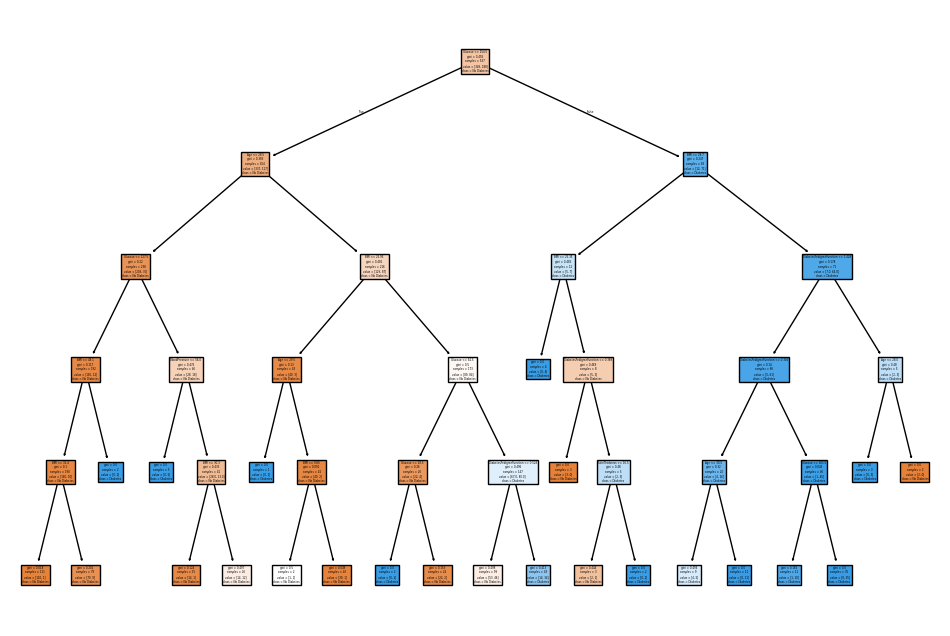

In [46]:
# Visualización del árbol 
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plot_tree(modelo, feature_names=columnas[:-1], class_names=['No Diabetes', 'Diabetes'], filled=True)
plt.show()

***EJERCICIO DOS***

In [47]:
# Generar datos sintéticos
X, y = make_classification(n_samples=500, n_features=6, n_informative=3, random_state=42)


In [48]:
# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [49]:
# Crear y entrenar modelo
modelo = DecisionTreeClassifier(max_depth=4, min_samples_split=20, random_state=42)  # Parámetros para controlar complejidad
modelo.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=20, random_state=42)

In [50]:
# Evaluar modelo
y_pred = modelo.predict(X_test)
print("Exactitud:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

Exactitud: 0.94

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94        74
           1       0.96      0.92      0.94        76

    accuracy                           0.94       150
   macro avg       0.94      0.94      0.94       150
weighted avg       0.94      0.94      0.94       150



***EJERCICIO TRES***

In [51]:
# Cargar datos
url = "https://raw.githubusercontent.com/arib168/data/main/Social_Network_Ads.csv"
data = pd.read_csv(url)
print(data.head(10))

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
5  15728773    Male   27            58000          0
6  15598044  Female   27            84000          0
7  15694829  Female   32           150000          1
8  15600575    Male   25            33000          0
9  15727311  Female   35            65000          0


In [52]:
# Seleccionar características y objetivo
X = data[['Age', 'EstimatedSalary']]
y = data['Purchased']

In [53]:
# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Crear y entrenar modelo
modelo = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=42)
modelo.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=42)

In [55]:
# Evaluar modelo
y_pred = modelo.predict(X_test)
print("Exactitud:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

Exactitud: 0.9333333333333333

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.97      0.92      0.94        73
           1       0.88      0.96      0.92        47

    accuracy                           0.93       120
   macro avg       0.93      0.94      0.93       120
weighted avg       0.94      0.93      0.93       120



d:\Matias\py\mi_entorno\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


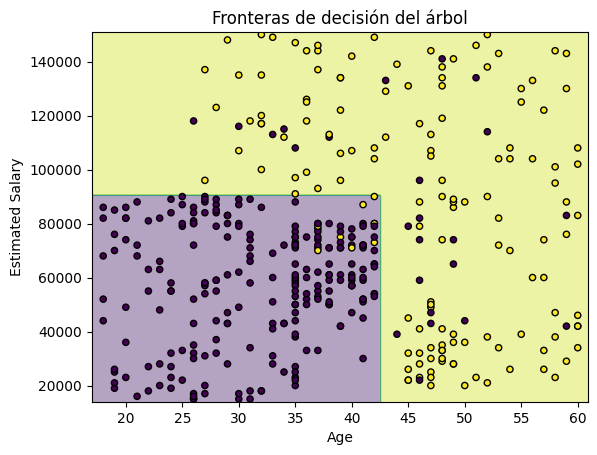

In [ ]:
# Visualización de fronteras de decisión 
import numpy as np
import matplotlib.pyplot as plt

x_min, x_max = X['Age'].min() - 1, X['Age'].max() + 1
y_min, y_max = X['EstimatedSalary'].min() - 1000, X['EstimatedSalary'].max() + 10003
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 100))

Z = modelo.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X['Age'], X['EstimatedSalary'], c=y, s=20, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Fronteras de decisión del árbol')
plt.show()

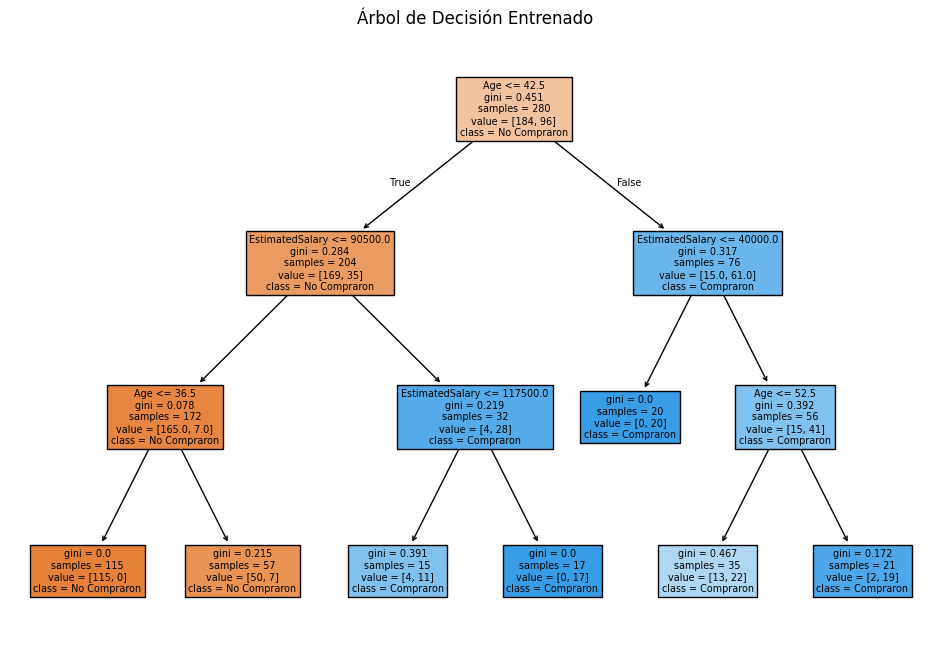

In [57]:
# Visualización del árbol de decisión
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(modelo, feature_names=['Age', 'EstimatedSalary'],
          class_names=['No Compraron', 'Compraron'], filled=True)
plt.title('Árbol de Decisión Entrenado')
plt.show()
